In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from torchvision import datasets, transforms

train_set = datasets.MNIST(root='/data/nieruichen/Deep-Learning-Intro-Assignments/MNIST_data', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.MNIST(root='/data/nieruichen/Deep-Learning-Intro-Assignments/MNIST_data', train=False, download=True, transform=transforms.ToTensor())
train_size = len(train_set)
test_size = len(test_set)
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

Training dataset size:  60000
Test dataset size:  10000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

In [8]:
# 数据加载
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# 设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

定义训练和测试函数

In [9]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc="Train"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    return running_loss / total, correct / total

def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Test"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return running_loss / total, correct / total

纯MLP模型

In [21]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)   # 输入层到隐藏层
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(256, 10)      # 隐藏层到输出层

    def forward(self, x):
        x = x.view(x.size(0), -1)          # 展平成(batch, 784)
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)             # 如果用CrossEntropyLoss，这一行建议注释掉
        return x

Train:   0%|          | 0/938 [00:00<?, ?it/s]

Test: 100%|██████████| 157/157 [00:00<00:00, 183.84it/s]


Epoch 1/15 | Train Loss: 2.2390 Acc: 0.3714 | Test Loss: 2.1365 Acc: 0.6477


Test: 100%|██████████| 157/157 [00:00<00:00, 185.80it/s]


Epoch 2/15 | Train Loss: 2.0061 Acc: 0.7295 | Test Loss: 1.8927 Acc: 0.7516


Test: 100%|██████████| 157/157 [00:00<00:00, 185.47it/s]


Epoch 3/15 | Train Loss: 1.8392 Acc: 0.7980 | Test Loss: 1.7892 Acc: 0.8067


Test: 100%|██████████| 157/157 [00:00<00:00, 167.82it/s]


Epoch 4/15 | Train Loss: 1.7671 Acc: 0.8122 | Test Loss: 1.7378 Acc: 0.8299


Test: 100%|██████████| 157/157 [00:00<00:00, 184.82it/s]


Epoch 5/15 | Train Loss: 1.7269 Acc: 0.8238 | Test Loss: 1.7058 Acc: 0.8424


Test: 100%|██████████| 157/157 [00:01<00:00, 153.81it/s]


Epoch 6/15 | Train Loss: 1.7008 Acc: 0.8345 | Test Loss: 1.6843 Acc: 0.8443


Test: 100%|██████████| 157/157 [00:00<00:00, 184.33it/s]


Epoch 7/15 | Train Loss: 1.6824 Acc: 0.8406 | Test Loss: 1.6686 Acc: 0.8556


Test: 100%|██████████| 157/157 [00:00<00:00, 187.98it/s]


Epoch 8/15 | Train Loss: 1.6687 Acc: 0.8481 | Test Loss: 1.6565 Acc: 0.8598


Test: 100%|██████████| 157/157 [00:00<00:00, 188.27it/s]


Epoch 9/15 | Train Loss: 1.6578 Acc: 0.8540 | Test Loss: 1.6468 Acc: 0.8639


Test: 100%|██████████| 157/157 [00:00<00:00, 181.54it/s]


Epoch 10/15 | Train Loss: 1.6488 Acc: 0.8584 | Test Loss: 1.6386 Acc: 0.8707


Test: 100%|██████████| 157/157 [00:00<00:00, 172.95it/s]


Epoch 11/15 | Train Loss: 1.6411 Acc: 0.8625 | Test Loss: 1.6315 Acc: 0.8734


Test: 100%|██████████| 157/157 [00:00<00:00, 186.21it/s]


Epoch 12/15 | Train Loss: 1.6345 Acc: 0.8644 | Test Loss: 1.6254 Acc: 0.8658


Test: 100%|██████████| 157/157 [00:00<00:00, 180.54it/s]


Epoch 13/15 | Train Loss: 1.6287 Acc: 0.8650 | Test Loss: 1.6198 Acc: 0.8721


Test: 100%|██████████| 157/157 [00:00<00:00, 189.35it/s]


Epoch 14/15 | Train Loss: 1.6235 Acc: 0.8662 | Test Loss: 1.6151 Acc: 0.8750


Test: 100%|██████████| 157/157 [00:00<00:00, 170.60it/s]


Epoch 15/15 | Train Loss: 1.6190 Acc: 0.8674 | Test Loss: 1.6110 Acc: 0.8714


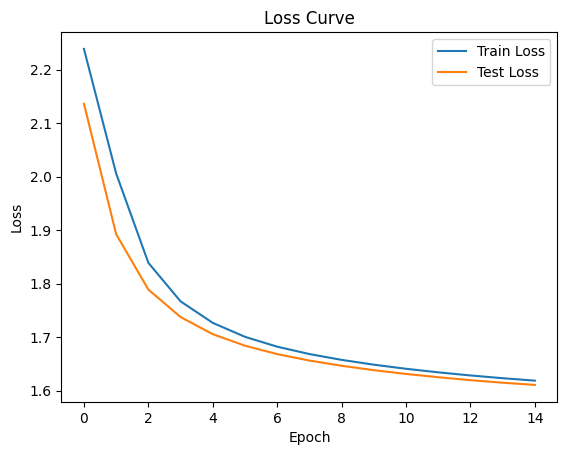

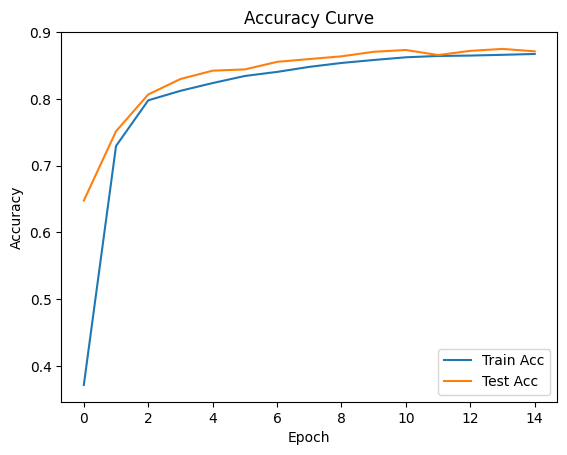

In [15]:
# 实例化模型
model = MLP().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

纯CNN模型

In [23]:
import torch.nn as nn

class PureCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.sigmoid = nn.Sigmoid()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 10, 7, 1, 0)  # 7x7核，输出10通道
        self.gap = nn.AdaptiveAvgPool2d(1)  # GAP

    def forward(self, x):
        x = self.pool(self.sigmoid(self.conv1(x)))
        x = self.pool(self.sigmoid(self.conv2(x)))
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)  # (batch, 10)
        return x

Train:   0%|          | 0/938 [00:00<?, ?it/s]

Test: 100%|██████████| 157/157 [00:00<00:00, 181.34it/s]


Epoch 1/15 | Train Loss: 2.1373 Acc: 0.2453 | Test Loss: 1.3056 Acc: 0.5845


Test: 100%|██████████| 157/157 [00:00<00:00, 181.13it/s]


Epoch 2/15 | Train Loss: 0.6181 Acc: 0.8142 | Test Loss: 0.5319 Acc: 0.8176


Test: 100%|██████████| 157/157 [00:00<00:00, 184.47it/s]


Epoch 3/15 | Train Loss: 0.4098 Acc: 0.8754 | Test Loss: 0.3539 Acc: 0.8869


Test: 100%|██████████| 157/157 [00:00<00:00, 176.12it/s]


Epoch 4/15 | Train Loss: 0.3441 Acc: 0.8966 | Test Loss: 0.3318 Acc: 0.9022


Test: 100%|██████████| 157/157 [00:00<00:00, 181.08it/s]


Epoch 5/15 | Train Loss: 0.2986 Acc: 0.9101 | Test Loss: 0.3019 Acc: 0.9079


Test: 100%|██████████| 157/157 [00:00<00:00, 182.03it/s]


Epoch 6/15 | Train Loss: 0.2627 Acc: 0.9215 | Test Loss: 0.2410 Acc: 0.9296


Test: 100%|██████████| 157/157 [00:00<00:00, 176.37it/s]


Epoch 7/15 | Train Loss: 0.2357 Acc: 0.9307 | Test Loss: 0.2156 Acc: 0.9363


Test: 100%|██████████| 157/157 [00:00<00:00, 181.78it/s]


Epoch 8/15 | Train Loss: 0.2131 Acc: 0.9378 | Test Loss: 0.1902 Acc: 0.9436


Test: 100%|██████████| 157/157 [00:00<00:00, 184.71it/s]


Epoch 9/15 | Train Loss: 0.1947 Acc: 0.9438 | Test Loss: 0.1778 Acc: 0.9505


Test: 100%|██████████| 157/157 [00:00<00:00, 171.92it/s]


Epoch 10/15 | Train Loss: 0.1790 Acc: 0.9481 | Test Loss: 0.1815 Acc: 0.9476


Test: 100%|██████████| 157/157 [00:00<00:00, 180.41it/s]


Epoch 11/15 | Train Loss: 0.1666 Acc: 0.9520 | Test Loss: 0.1509 Acc: 0.9573


Test: 100%|██████████| 157/157 [00:00<00:00, 175.63it/s]


Epoch 12/15 | Train Loss: 0.1548 Acc: 0.9560 | Test Loss: 0.1548 Acc: 0.9537


Test: 100%|██████████| 157/157 [00:00<00:00, 165.94it/s]


Epoch 13/15 | Train Loss: 0.1456 Acc: 0.9585 | Test Loss: 0.1400 Acc: 0.9564


Test: 100%|██████████| 157/157 [00:00<00:00, 179.82it/s]


Epoch 14/15 | Train Loss: 0.1376 Acc: 0.9613 | Test Loss: 0.1279 Acc: 0.9616


Test: 100%|██████████| 157/157 [00:00<00:00, 177.37it/s]


Epoch 15/15 | Train Loss: 0.1307 Acc: 0.9623 | Test Loss: 0.1188 Acc: 0.9641


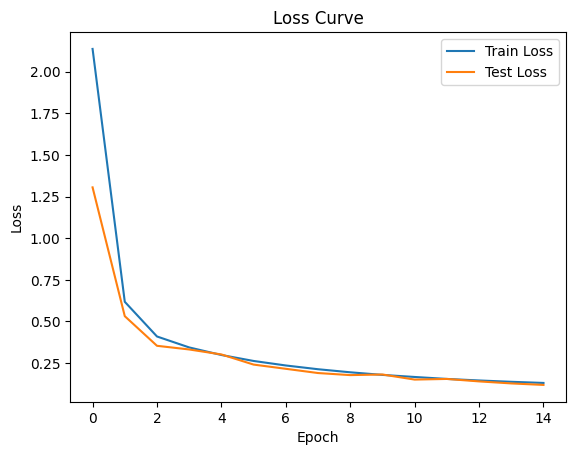

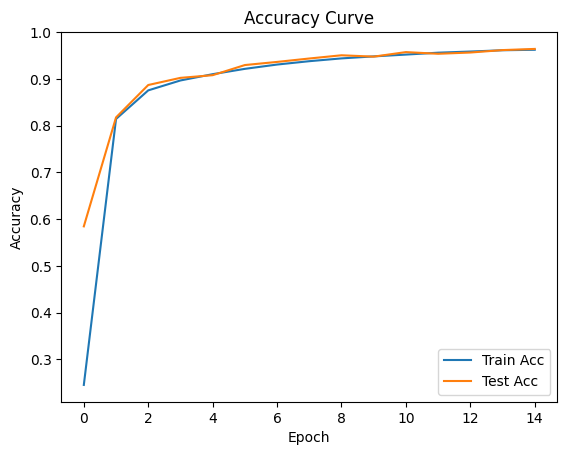

In [12]:
# 实例化模型
model = PureCNN().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

Replace the optimizer from SGD to Adam, observe the experimental results.Why are such results obtained? How to optimize it?

Test: 100%|██████████| 157/157 [00:00<00:00, 177.47it/s]


Epoch 1/15 | Train Loss: 2.0787 Acc: 0.1530 | Test Loss: 2.0698 Acc: 0.1816


Test: 100%|██████████| 157/157 [00:00<00:00, 186.23it/s]


Epoch 2/15 | Train Loss: 2.0705 Acc: 0.1819 | Test Loss: 2.0668 Acc: 0.1905


Test: 100%|██████████| 157/157 [00:00<00:00, 188.39it/s]


Epoch 3/15 | Train Loss: 2.0693 Acc: 0.1966 | Test Loss: 2.0682 Acc: 0.1998


Test: 100%|██████████| 157/157 [00:00<00:00, 189.87it/s]


Epoch 4/15 | Train Loss: 2.0686 Acc: 0.1969 | Test Loss: 2.0653 Acc: 0.2083


Test: 100%|██████████| 157/157 [00:00<00:00, 184.98it/s]


Epoch 5/15 | Train Loss: 2.0672 Acc: 0.2014 | Test Loss: 2.0717 Acc: 0.2108


Test: 100%|██████████| 157/157 [00:00<00:00, 187.13it/s]


Epoch 6/15 | Train Loss: 2.0660 Acc: 0.2039 | Test Loss: 2.0624 Acc: 0.2073


Test: 100%|██████████| 157/157 [00:00<00:00, 188.15it/s]


Epoch 7/15 | Train Loss: 2.0672 Acc: 0.2013 | Test Loss: 2.0695 Acc: 0.2053


Test: 100%|██████████| 157/157 [00:00<00:00, 186.39it/s]


Epoch 8/15 | Train Loss: 2.0645 Acc: 0.2036 | Test Loss: 2.0732 Acc: 0.2105


Test: 100%|██████████| 157/157 [00:00<00:00, 188.18it/s]


Epoch 9/15 | Train Loss: 2.0651 Acc: 0.2035 | Test Loss: 2.0619 Acc: 0.2081


Test: 100%|██████████| 157/157 [00:00<00:00, 190.46it/s]


Epoch 10/15 | Train Loss: 2.0654 Acc: 0.2048 | Test Loss: 2.0645 Acc: 0.2053


Test: 100%|██████████| 157/157 [00:00<00:00, 185.57it/s]


Epoch 11/15 | Train Loss: 2.0655 Acc: 0.2055 | Test Loss: 2.0666 Acc: 0.2081


Test: 100%|██████████| 157/157 [00:00<00:00, 189.30it/s]


Epoch 12/15 | Train Loss: 2.0644 Acc: 0.2050 | Test Loss: 2.0617 Acc: 0.2049


Test: 100%|██████████| 157/157 [00:00<00:00, 188.42it/s]


Epoch 13/15 | Train Loss: 2.0642 Acc: 0.2049 | Test Loss: 2.0604 Acc: 0.2084


Test: 100%|██████████| 157/157 [00:00<00:00, 188.62it/s]


Epoch 14/15 | Train Loss: 2.0651 Acc: 0.2056 | Test Loss: 2.0603 Acc: 0.2064


Test: 100%|██████████| 157/157 [00:00<00:00, 186.57it/s]


Epoch 15/15 | Train Loss: 2.0643 Acc: 0.2064 | Test Loss: 2.0676 Acc: 0.2106


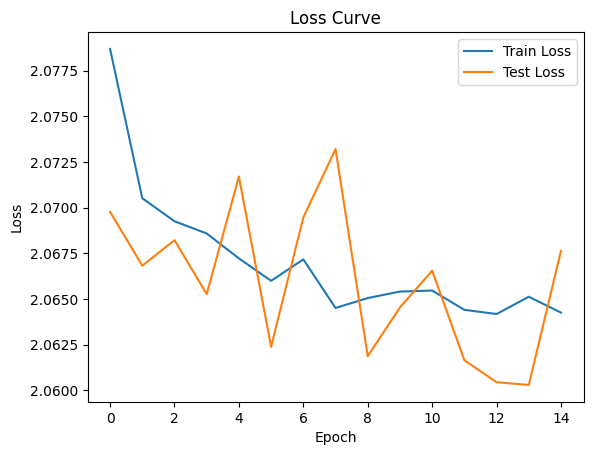

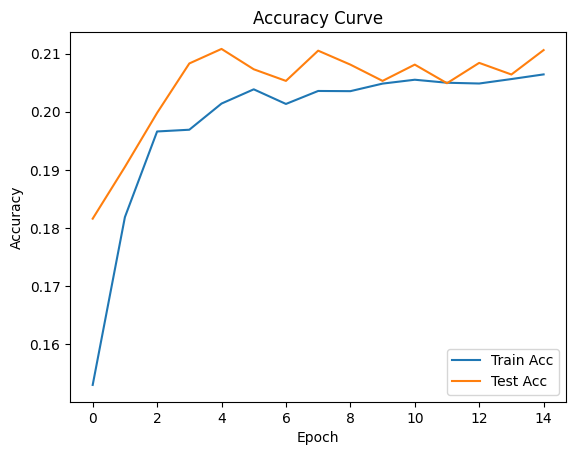

In [22]:
# 实例化模型
model = MLP().to(device)

# 优化器和损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

Test: 100%|██████████| 157/157 [00:00<00:00, 181.27it/s]


Epoch 1/15 | Train Loss: 2.3766 Acc: 0.1041 | Test Loss: 2.3030 Acc: 0.1010


Test: 100%|██████████| 157/157 [00:00<00:00, 179.11it/s]


Epoch 2/15 | Train Loss: 2.3057 Acc: 0.1022 | Test Loss: 2.3054 Acc: 0.1028


Test: 100%|██████████| 157/157 [00:00<00:00, 180.45it/s]


Epoch 3/15 | Train Loss: 2.3063 Acc: 0.1045 | Test Loss: 2.3041 Acc: 0.1135


Test: 100%|██████████| 157/157 [00:00<00:00, 182.17it/s]


Epoch 4/15 | Train Loss: 2.3055 Acc: 0.1052 | Test Loss: 2.3042 Acc: 0.1135


Test: 100%|██████████| 157/157 [00:00<00:00, 185.95it/s]


Epoch 5/15 | Train Loss: 2.3054 Acc: 0.1053 | Test Loss: 2.3025 Acc: 0.1135


Test: 100%|██████████| 157/157 [00:00<00:00, 166.66it/s]


Epoch 6/15 | Train Loss: 2.3055 Acc: 0.1070 | Test Loss: 2.3106 Acc: 0.0980


Test: 100%|██████████| 157/157 [00:00<00:00, 186.35it/s]


Epoch 7/15 | Train Loss: 2.3055 Acc: 0.1064 | Test Loss: 2.3043 Acc: 0.1009


Test: 100%|██████████| 157/157 [00:00<00:00, 168.84it/s]


Epoch 8/15 | Train Loss: 2.3057 Acc: 0.1069 | Test Loss: 2.3106 Acc: 0.0958


Test: 100%|██████████| 157/157 [00:00<00:00, 183.39it/s]


Epoch 9/15 | Train Loss: 2.3057 Acc: 0.1051 | Test Loss: 2.3059 Acc: 0.0980


Test: 100%|██████████| 157/157 [00:00<00:00, 180.09it/s]


Epoch 10/15 | Train Loss: 2.3056 Acc: 0.1056 | Test Loss: 2.3046 Acc: 0.1135


Test: 100%|██████████| 157/157 [00:01<00:00, 149.49it/s]


Epoch 11/15 | Train Loss: 2.3056 Acc: 0.1074 | Test Loss: 2.3104 Acc: 0.0958


Test: 100%|██████████| 157/157 [00:00<00:00, 184.23it/s]


Epoch 12/15 | Train Loss: 2.3063 Acc: 0.1031 | Test Loss: 2.3060 Acc: 0.1028


Test: 100%|██████████| 157/157 [00:00<00:00, 183.54it/s]


Epoch 13/15 | Train Loss: 2.3058 Acc: 0.1052 | Test Loss: 2.3064 Acc: 0.0982


Test: 100%|██████████| 157/157 [00:00<00:00, 184.26it/s]


Epoch 14/15 | Train Loss: 2.3057 Acc: 0.1064 | Test Loss: 2.3036 Acc: 0.1135


Test: 100%|██████████| 157/157 [00:01<00:00, 145.98it/s]


Epoch 15/15 | Train Loss: 2.3056 Acc: 0.1067 | Test Loss: 2.3054 Acc: 0.1135


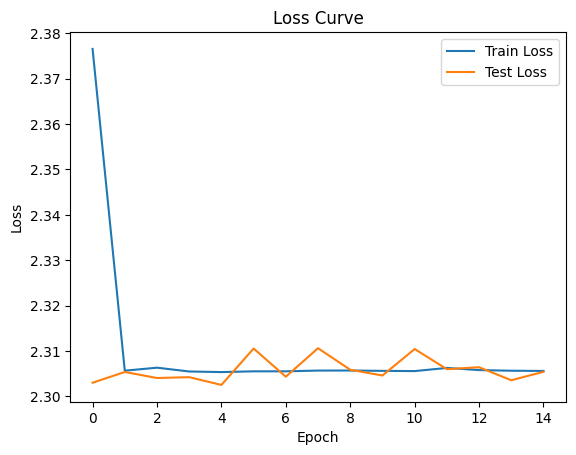

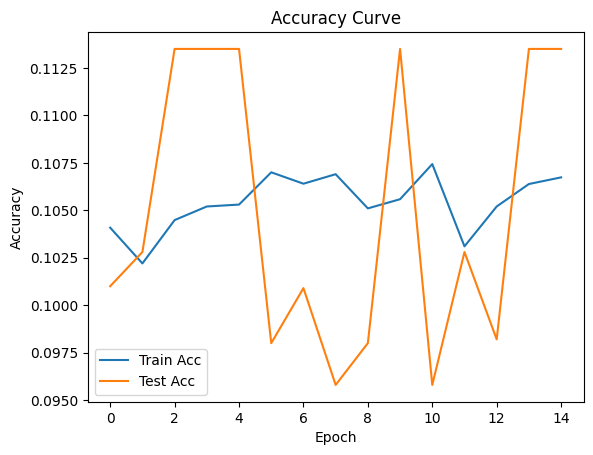

In [24]:
# 实例化模型
model = PureCNN().to(device)

# 优化器和损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

Switch the activation function from Sigmoid to ReLU.What are the differences compared to the previous one?

In [17]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)   # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)      # 隐藏层到输出层

    def forward(self, x):
        x = x.view(x.size(0), -1)          # 展平成(batch, 784)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.relu(x)             # 如果用CrossEntropyLoss，这一行建议注释掉
        return x

Train:   0%|          | 0/938 [00:00<?, ?it/s]

Test: 100%|██████████| 157/157 [00:00<00:00, 182.79it/s]


Epoch 1/15 | Train Loss: 0.8184 Acc: 0.7572 | Test Loss: 0.5654 Acc: 0.8052


Test: 100%|██████████| 157/157 [00:00<00:00, 183.81it/s]


Epoch 2/15 | Train Loss: 0.5359 Acc: 0.8139 | Test Loss: 0.5011 Acc: 0.8211


Test: 100%|██████████| 157/157 [00:00<00:00, 179.72it/s]


Epoch 3/15 | Train Loss: 0.4831 Acc: 0.8289 | Test Loss: 0.4637 Acc: 0.8303


Test: 100%|██████████| 157/157 [00:00<00:00, 187.29it/s]


Epoch 4/15 | Train Loss: 0.4486 Acc: 0.8383 | Test Loss: 0.4372 Acc: 0.8370


Test: 100%|██████████| 157/157 [00:00<00:00, 183.42it/s]


Epoch 5/15 | Train Loss: 0.4236 Acc: 0.8449 | Test Loss: 0.4157 Acc: 0.8438


Test: 100%|██████████| 157/157 [00:01<00:00, 153.21it/s]


Epoch 6/15 | Train Loss: 0.4046 Acc: 0.8507 | Test Loss: 0.4018 Acc: 0.8471


Test: 100%|██████████| 157/157 [00:00<00:00, 186.50it/s]


Epoch 7/15 | Train Loss: 0.3895 Acc: 0.8544 | Test Loss: 0.3882 Acc: 0.8522


Test: 100%|██████████| 157/157 [00:00<00:00, 185.94it/s]


Epoch 8/15 | Train Loss: 0.3773 Acc: 0.8580 | Test Loss: 0.3803 Acc: 0.8546


Test: 100%|██████████| 157/157 [00:00<00:00, 186.29it/s]


Epoch 9/15 | Train Loss: 0.3670 Acc: 0.8609 | Test Loss: 0.3722 Acc: 0.8566


Test: 100%|██████████| 157/157 [00:00<00:00, 187.97it/s]


Epoch 10/15 | Train Loss: 0.3581 Acc: 0.8632 | Test Loss: 0.3682 Acc: 0.8574


Test: 100%|██████████| 157/157 [00:00<00:00, 187.35it/s]


Epoch 11/15 | Train Loss: 0.3503 Acc: 0.8655 | Test Loss: 0.3644 Acc: 0.8588


Test: 100%|██████████| 157/157 [00:00<00:00, 178.72it/s]


Epoch 12/15 | Train Loss: 0.3440 Acc: 0.8673 | Test Loss: 0.3581 Acc: 0.8601


Test: 100%|██████████| 157/157 [00:00<00:00, 189.02it/s]


Epoch 13/15 | Train Loss: 0.3383 Acc: 0.8685 | Test Loss: 0.3537 Acc: 0.8606


Test: 100%|██████████| 157/157 [00:00<00:00, 167.75it/s]


Epoch 14/15 | Train Loss: 0.3332 Acc: 0.8699 | Test Loss: 0.3514 Acc: 0.8616


Test: 100%|██████████| 157/157 [00:00<00:00, 159.20it/s]


Epoch 15/15 | Train Loss: 0.3286 Acc: 0.8709 | Test Loss: 0.3485 Acc: 0.8641


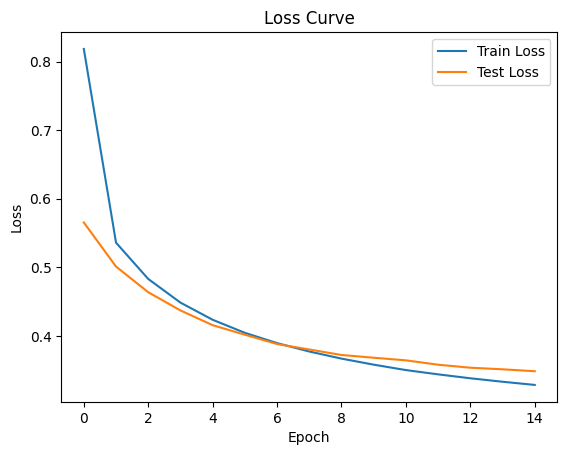

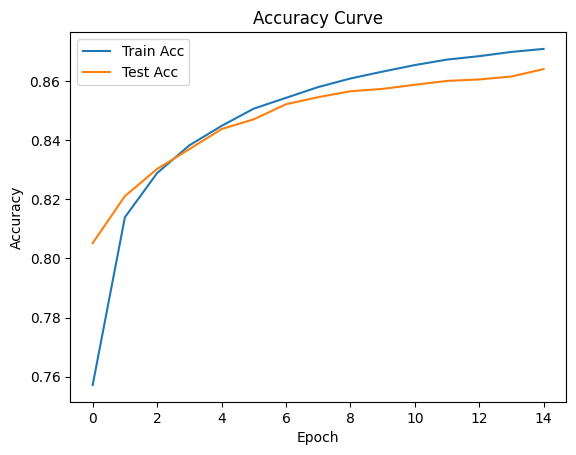

In [18]:
# 实例化模型
model = MLP().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [19]:
class PureCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 10, 7, 1, 0)  # 7x7核，输出10通道
        self.gap = nn.AdaptiveAvgPool2d(1)  # GAP

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)  # (batch, 10)
        return x

Test: 100%|██████████| 157/157 [00:00<00:00, 180.07it/s]


Epoch 1/15 | Train Loss: 0.3583 Acc: 0.8919 | Test Loss: 0.1260 Acc: 0.9623


Test: 100%|██████████| 157/157 [00:00<00:00, 180.79it/s]


Epoch 2/15 | Train Loss: 0.1067 Acc: 0.9672 | Test Loss: 0.0880 Acc: 0.9738


Test: 100%|██████████| 157/157 [00:00<00:00, 181.21it/s]


Epoch 3/15 | Train Loss: 0.0791 Acc: 0.9758 | Test Loss: 0.0764 Acc: 0.9753


Test: 100%|██████████| 157/157 [00:00<00:00, 167.62it/s]


Epoch 4/15 | Train Loss: 0.0653 Acc: 0.9801 | Test Loss: 0.0703 Acc: 0.9752


Test: 100%|██████████| 157/157 [00:00<00:00, 182.97it/s]


Epoch 5/15 | Train Loss: 0.0573 Acc: 0.9828 | Test Loss: 0.0530 Acc: 0.9828


Test: 100%|██████████| 157/157 [00:00<00:00, 181.56it/s]


Epoch 6/15 | Train Loss: 0.0506 Acc: 0.9843 | Test Loss: 0.0841 Acc: 0.9729


Test: 100%|██████████| 157/157 [00:00<00:00, 170.01it/s]


Epoch 7/15 | Train Loss: 0.0474 Acc: 0.9856 | Test Loss: 0.0520 Acc: 0.9819


Test: 100%|██████████| 157/157 [00:00<00:00, 184.28it/s]


Epoch 8/15 | Train Loss: 0.0436 Acc: 0.9864 | Test Loss: 0.0469 Acc: 0.9843


Test: 100%|██████████| 157/157 [00:00<00:00, 180.66it/s]


Epoch 9/15 | Train Loss: 0.0411 Acc: 0.9867 | Test Loss: 0.0410 Acc: 0.9864


Test: 100%|██████████| 157/157 [00:00<00:00, 183.03it/s]


Epoch 10/15 | Train Loss: 0.0375 Acc: 0.9879 | Test Loss: 0.0384 Acc: 0.9870


Test: 100%|██████████| 157/157 [00:00<00:00, 183.60it/s]


Epoch 11/15 | Train Loss: 0.0360 Acc: 0.9888 | Test Loss: 0.0398 Acc: 0.9869


Test: 100%|██████████| 157/157 [00:00<00:00, 176.62it/s]


Epoch 12/15 | Train Loss: 0.0334 Acc: 0.9895 | Test Loss: 0.0404 Acc: 0.9857


Test: 100%|██████████| 157/157 [00:00<00:00, 183.18it/s]


Epoch 13/15 | Train Loss: 0.0319 Acc: 0.9896 | Test Loss: 0.0370 Acc: 0.9878


Test: 100%|██████████| 157/157 [00:00<00:00, 178.83it/s]


Epoch 14/15 | Train Loss: 0.0303 Acc: 0.9906 | Test Loss: 0.0395 Acc: 0.9871


Test: 100%|██████████| 157/157 [00:00<00:00, 186.74it/s]


Epoch 15/15 | Train Loss: 0.0292 Acc: 0.9907 | Test Loss: 0.0368 Acc: 0.9880


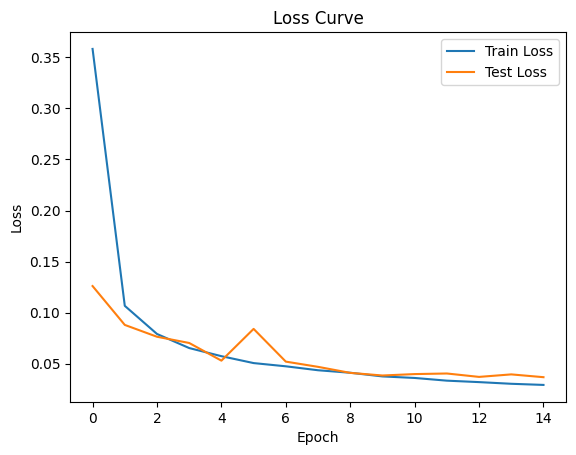

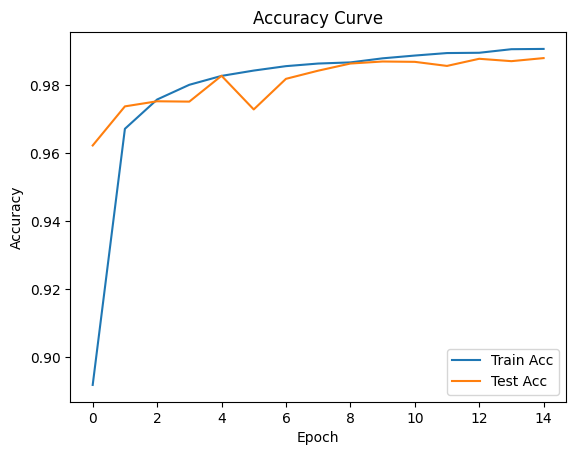

In [20]:
# 实例化模型
model = PureCNN().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [26]:
class MLP_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(256, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.last_output = None  # 用于保存输出

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.sigmoid(self.bn1(self.fc1(x)))
        x = self.bn2(self.fc2(x))
        x = self.sigmoid(x)
        self.last_output = x.detach().cpu()  # 保存输出
        return x

Train:   0%|          | 0/938 [00:00<?, ?it/s]

Test: 100%|██████████| 157/157 [00:00<00:00, 181.54it/s]


Epoch 1/15 | Train Loss: 1.8749 Acc: 0.8484 | Test Loss: 1.8036 Acc: 0.8810


Test: 100%|██████████| 157/157 [00:00<00:00, 173.33it/s]


Epoch 2/15 | Train Loss: 1.7669 Acc: 0.8759 | Test Loss: 1.7299 Acc: 0.8906


Test: 100%|██████████| 157/157 [00:00<00:00, 182.96it/s]


Epoch 3/15 | Train Loss: 1.6999 Acc: 0.9002 | Test Loss: 1.6703 Acc: 0.9248


Test: 100%|██████████| 157/157 [00:00<00:00, 179.67it/s]


Epoch 4/15 | Train Loss: 1.6559 Acc: 0.9165 | Test Loss: 1.6358 Acc: 0.9327


Test: 100%|██████████| 157/157 [00:00<00:00, 185.41it/s]


Epoch 5/15 | Train Loss: 1.6250 Acc: 0.9308 | Test Loss: 1.6117 Acc: 0.9338


Test: 100%|██████████| 157/157 [00:00<00:00, 172.24it/s]


Epoch 6/15 | Train Loss: 1.6031 Acc: 0.9383 | Test Loss: 1.5873 Acc: 0.9488


Test: 100%|██████████| 157/157 [00:00<00:00, 182.89it/s]


Epoch 7/15 | Train Loss: 1.5871 Acc: 0.9446 | Test Loss: 1.5759 Acc: 0.9469


Test: 100%|██████████| 157/157 [00:00<00:00, 181.79it/s]


Epoch 8/15 | Train Loss: 1.5743 Acc: 0.9509 | Test Loss: 1.5647 Acc: 0.9537


Test: 100%|██████████| 157/157 [00:00<00:00, 182.46it/s]


Epoch 9/15 | Train Loss: 1.5649 Acc: 0.9537 | Test Loss: 1.5521 Acc: 0.9603


Test: 100%|██████████| 157/157 [00:00<00:00, 184.23it/s]


Epoch 10/15 | Train Loss: 1.5565 Acc: 0.9571 | Test Loss: 1.5483 Acc: 0.9593


Test: 100%|██████████| 157/157 [00:00<00:00, 184.43it/s]


Epoch 11/15 | Train Loss: 1.5495 Acc: 0.9602 | Test Loss: 1.5440 Acc: 0.9613


Test: 100%|██████████| 157/157 [00:00<00:00, 181.96it/s]


Epoch 12/15 | Train Loss: 1.5444 Acc: 0.9614 | Test Loss: 1.5528 Acc: 0.9566


Test: 100%|██████████| 157/157 [00:00<00:00, 183.85it/s]


Epoch 13/15 | Train Loss: 1.5393 Acc: 0.9641 | Test Loss: 1.5357 Acc: 0.9634


Test: 100%|██████████| 157/157 [00:00<00:00, 164.51it/s]


Epoch 14/15 | Train Loss: 1.5350 Acc: 0.9668 | Test Loss: 1.5317 Acc: 0.9642


Test: 100%|██████████| 157/157 [00:00<00:00, 183.56it/s]


Epoch 15/15 | Train Loss: 1.5311 Acc: 0.9674 | Test Loss: 1.5352 Acc: 0.9641


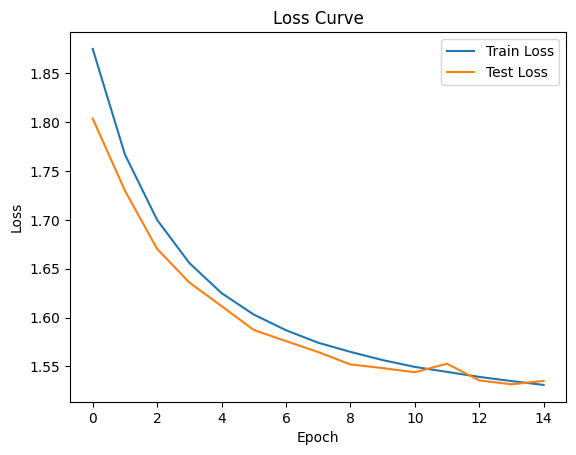

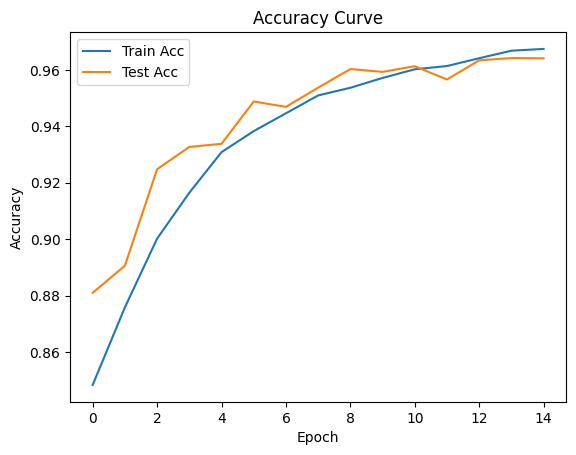

In [27]:
# 实例化模型
model = MLP_BN().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

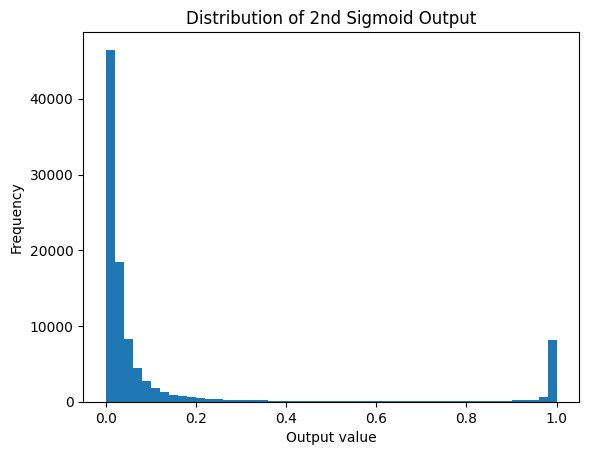

In [28]:
outputs_list = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _ = model(images)
        outputs_list.append(model.last_output)

import torch
all_outputs = torch.cat(outputs_list, dim=0).numpy().flatten()

import matplotlib.pyplot as plt
plt.hist(all_outputs, bins=50)
plt.xlabel('Output value')
plt.ylabel('Frequency')
plt.title('Distribution of 2nd Sigmoid Output')
plt.show()

In [29]:
class PureCNN_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.bn1 = nn.BatchNorm2d(16)
        self.sigmoid = nn.Sigmoid()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 10, 7, 1, 0)  # 7x7核，输出10通道
        self.gap = nn.AdaptiveAvgPool2d(1)  # GAP
        self.second_sigmoid = None  # 保存输出

    def forward(self, x):
        x = self.pool(self.sigmoid(self.bn1(self.conv1(x))))
        x = self.sigmoid(self.bn2(self.conv2(x)))
        self.second_sigmoid = x.detach().cpu()
        x = self.pool(x)
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)  # (batch, 10)
        return x

Test: 100%|██████████| 157/157 [00:01<00:00, 146.09it/s]


Epoch 1/15 | Train Loss: 0.7215 Acc: 0.8192 | Test Loss: 0.2154 Acc: 0.9406


Test: 100%|██████████| 157/157 [00:00<00:00, 169.98it/s]


Epoch 2/15 | Train Loss: 0.1802 Acc: 0.9501 | Test Loss: 0.1552 Acc: 0.9567


Test: 100%|██████████| 157/157 [00:00<00:00, 165.47it/s]


Epoch 3/15 | Train Loss: 0.1271 Acc: 0.9645 | Test Loss: 0.1198 Acc: 0.9673


Test: 100%|██████████| 157/157 [00:01<00:00, 145.03it/s]


Epoch 4/15 | Train Loss: 0.1032 Acc: 0.9708 | Test Loss: 0.1033 Acc: 0.9695


Test: 100%|██████████| 157/157 [00:00<00:00, 167.47it/s]


Epoch 5/15 | Train Loss: 0.0886 Acc: 0.9751 | Test Loss: 0.1040 Acc: 0.9704


Test: 100%|██████████| 157/157 [00:00<00:00, 172.33it/s]


Epoch 6/15 | Train Loss: 0.0784 Acc: 0.9780 | Test Loss: 0.0843 Acc: 0.9740


Test: 100%|██████████| 157/157 [00:00<00:00, 169.35it/s]


Epoch 7/15 | Train Loss: 0.0721 Acc: 0.9790 | Test Loss: 0.0664 Acc: 0.9811


Test: 100%|██████████| 157/157 [00:00<00:00, 170.02it/s]


Epoch 8/15 | Train Loss: 0.0660 Acc: 0.9815 | Test Loss: 0.0830 Acc: 0.9760


Test: 100%|██████████| 157/157 [00:00<00:00, 168.28it/s]


Epoch 9/15 | Train Loss: 0.0616 Acc: 0.9822 | Test Loss: 0.0588 Acc: 0.9815


Test: 100%|██████████| 157/157 [00:00<00:00, 172.22it/s]


Epoch 10/15 | Train Loss: 0.0578 Acc: 0.9835 | Test Loss: 0.1590 Acc: 0.9484


Test: 100%|██████████| 157/157 [00:00<00:00, 171.07it/s]


Epoch 11/15 | Train Loss: 0.0545 Acc: 0.9846 | Test Loss: 0.0508 Acc: 0.9848


Test: 100%|██████████| 157/157 [00:00<00:00, 167.22it/s]


Epoch 12/15 | Train Loss: 0.0515 Acc: 0.9855 | Test Loss: 0.0510 Acc: 0.9841


Test: 100%|██████████| 157/157 [00:01<00:00, 140.43it/s]


Epoch 13/15 | Train Loss: 0.0492 Acc: 0.9860 | Test Loss: 0.0517 Acc: 0.9839


Test: 100%|██████████| 157/157 [00:00<00:00, 169.65it/s]


Epoch 14/15 | Train Loss: 0.0472 Acc: 0.9866 | Test Loss: 0.0833 Acc: 0.9752


Test: 100%|██████████| 157/157 [00:00<00:00, 158.28it/s]


Epoch 15/15 | Train Loss: 0.0456 Acc: 0.9865 | Test Loss: 0.0734 Acc: 0.9776


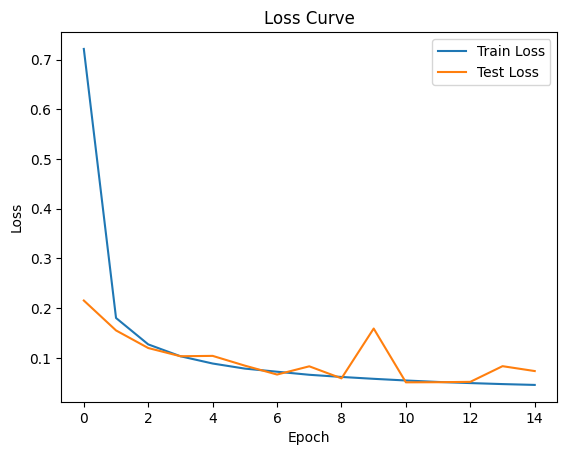

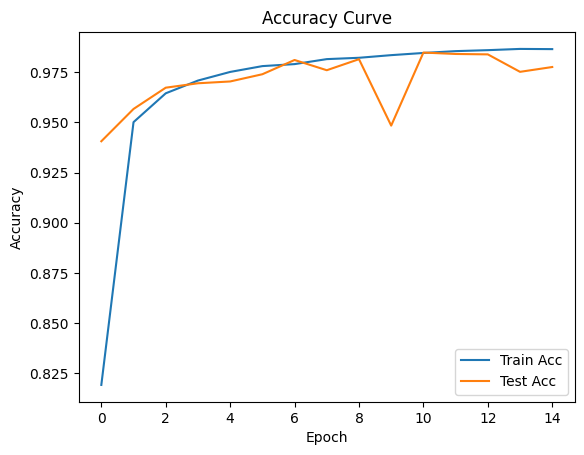

In [30]:
# 实例化模型
model = PureCNN_BN().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

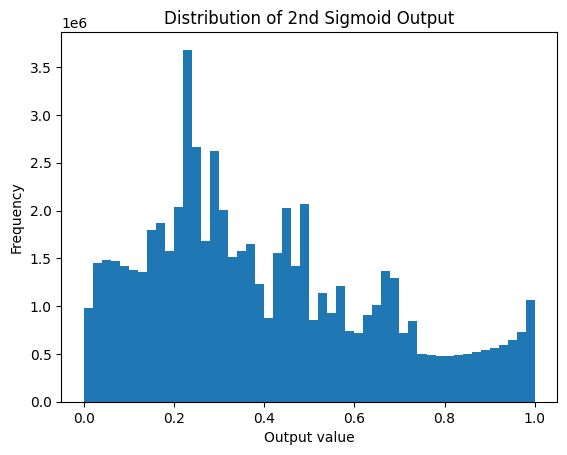

In [31]:
outputs_list = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        _ = model(images)
        outputs_list.append(model.second_sigmoid)

import torch
all_outputs = torch.cat(outputs_list, dim=0).numpy().flatten()

import matplotlib.pyplot as plt
plt.hist(all_outputs, bins=50)
plt.xlabel('Output value')
plt.ylabel('Frequency')
plt.title('Distribution of 2nd Sigmoid Output')
plt.show()

In [ ]:
from tqdm import tqdm 
# 定义CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1,stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 数据加载
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# 设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")
# 保存模型
torch.save(model.state_dict(), "mnist_cnn.pth")
print("模型已保存为 mnist_cnn.pth")
# 测试
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1/5:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1/5: 100%|██████████| 938/938 [00:07<00:00, 122.27it/s]


Epoch 1/5, Loss: 0.2110


Epoch 2/5: 100%|██████████| 938/938 [00:07<00:00, 125.50it/s]


Epoch 2/5, Loss: 0.0659


Epoch 3/5: 100%|██████████| 938/938 [00:07<00:00, 119.68it/s]


Epoch 3/5, Loss: 0.0472


Epoch 4/5: 100%|██████████| 938/938 [00:07<00:00, 123.72it/s]


Epoch 4/5, Loss: 0.0374


Epoch 5/5: 100%|██████████| 938/938 [00:07<00:00, 117.96it/s]


Epoch 5/5, Loss: 0.0295
模型已保存为 mnist_cnn.pth
Test Accuracy: 99.09%
